#  Cookbook de Numpy

Como o OpenCV usa o Numpy para guardar a imagem, é muito útil usar as funções dessa biblioteca. Ser competente em Numpy vai dar um boost nas suas habilidades com imagens.

In [5]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.5.3 


Cada seção deste guia apresenta operações frequentes e úteis com imagens. Use este notebook como consulta na hora de desenvolver as próximas atividades e APS.

Primeiramente vamos abrir a imagem da [arara](img/arara.jpg) e então convertela de BGR para RGB.

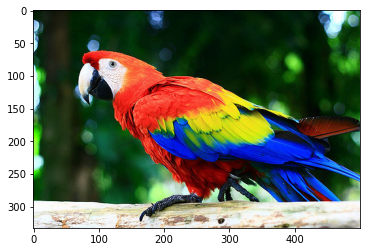

In [6]:
# Vamos ler a imagem da arara igual ao exemplo do notebook da última aula
arara = cv2.imread("img/arara.jpg")
arara = cv2.cvtColor(arara, cv2.COLOR_BGR2RGB)

plt.imshow(arara)
plt.show()

## ROI - Region of Interest

- Determinação de uma região retangular na imagem que se quer processar, de fora que ela possua as características de interesse. 
- Uma ROI define uma sub-imagem da imagem original, com menos linhas e/cou colunas

Para a definição de uma ROI, é necessário estabelecer:
- A linha inicial (`miny`)
- A coluna inicial (`minx`)
- A linha final (`maxy`)
- A coluna final (`maxx`)

A imagem do OpenCV em Python é armazenada dentro de uma estrutura tipo `array` bidimensional (tons de cinza) ou tridimensional (colorida)do pacote `numpy`, que permite a definição de ROIs através do fatiamento (*slicing*) dos eixos do `array`. Dessa forma, recuperamos uma ROI através do acesso por chaves:

`roi = imagem[minyy:maxy, minx:maxx]`

**Atenção:** os limites `maxy` e `maxx`para a linha e coluna respectivamente não estão inclusos na ROI.
Além disso, o acesso às linhas e colunas da nova imagem devem obedecer novos índices, começando pela linha 0 e coluna 0. 


In [7]:
minx, miny = 50,50
maxx, maxy = 250,250

Agora vamos utilizar as variáveis para definir uma região, que marcaremos. Continuaremos usando a arara neste exemplo.

In [8]:
yellow_rgb = (255,255,0)
arara_rgb = cv2.rectangle(arara_rgb, (minx, miny), (maxx, maxy), yellow_rgb)

NameError: name 'arara_rgb' is not defined

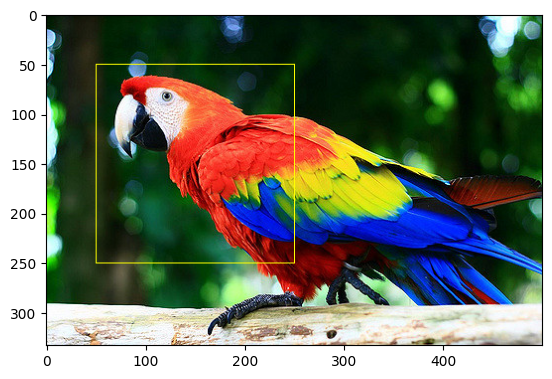

In [ ]:
plt.imshow(arara_rgb)
plt.show()

Vamos agora usar os valores do retângulo para recortar a imagem:

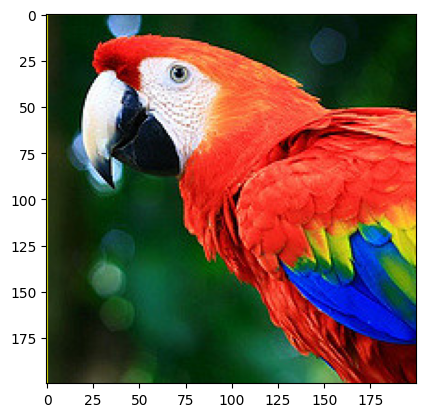

In [ ]:
recorte = arara_rgb[miny: maxy,minx: maxx]

plt.imshow(recorte)
plt.show()

## Mínimo, máximo, média, etc

Com o Numpy é muito fácil tirar estatísticas da imagem. 

Aqui vamos trabalhar com uma imagem em tons de cinza, mas desta vez vamos enviar um argumento para a função `cv2.imread` para ler a imagem **diretamente** em tons de cinza.

Neste exercício vamos visualizar a imagem do [RinTinTin](img/RinTinTin.jpg).

Referencia: https://en.wikipedia.org/wiki/Rin_Tin_Tin

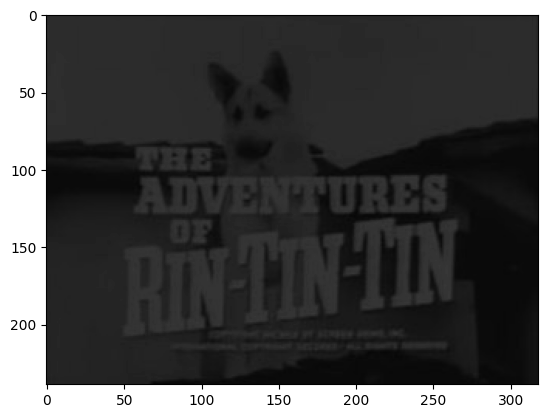

In [ ]:
rintin_gray = cv2.imread("img/RinTinTin.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(rintin_gray, cmap="gray", vmin=0, vmax=255)
plt.show()

As funções do Numpy que já eram usadas com arrays 1D continuam funcionando:

In [ ]:
minimo = np.min(rintin_gray)
maximo = np.max(rintin_gray)
media = np.mean(rintin_gray)

minimo, maximo, media

(7, 57, 33.6369174495408)

# Filtragem por valores

Na imagem do cão vamos transformar todos que têm valor acima da média em branco

In [ ]:
limiar_rintin = rintin_gray.copy()

Note que indexar o array por uma condicão *automaticamente seleciona todas as posições* em que a condição é válida

Vamos forçar quem está acima da média para branco (ou seja 255)

In [ ]:
limiar_rintin[rintin_gray > media] = 255

E quem está abaixo da média para preto:

In [ ]:
limiar_rintin[rintin_gray < media] = 0

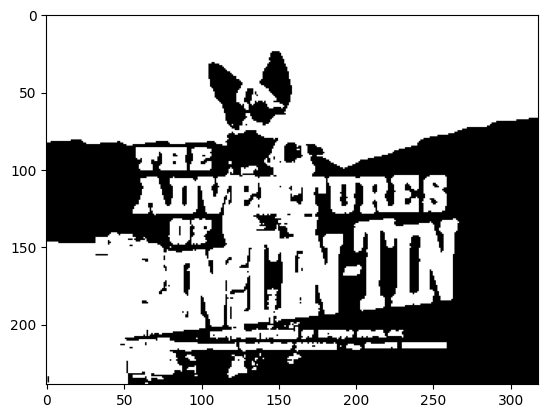

In [ ]:
plt.imshow(limiar_rintin, cmap="gray", vmin=0, vmax=255)
plt.show()

## Achar os índices dos valores que atendem a uma certa condição:

Agora, nosso objetivo é encontrar a posição, x, y, do pixel preto mas **acima** e mais à **esquerda** na imagem.

Para isso, vamos usar a função `np.where`.

In [ ]:
results = np.where(limiar_rintin==0)
results

(array([ 24,  24,  24, ..., 238, 238, 238]),
 array([146, 147, 148, ..., 315, 316, 317]))

A função `np.where` nos retorna um array de *linhas* e depois um array de *colunas* de todos os pixels que atendem a condição.

In [ ]:
i_linha = results[0]
i_linha

array([ 24,  24,  24, ..., 238, 238, 238])

In [ ]:
i_coluna = results[1]
i_coluna

array([146, 147, 148, ..., 315, 316, 317])

Vamos encontrar a primeira linha que contém o pixel preto (menor `y`):

In [ ]:
menor_linha = min(i_linha)
menor_linha

24

Note que a variável acima denota, dentre todas as posições que tinham pixel preto, qual a linha que veio primeiro, ou seja, a linha mais **acima**.

Porém, ainda desejamos encontrar o pixel mais à **esquerda**. Para isso, vamos usar a função `np.where` novamente, mas agora vamos usar o array `i_linha` como argumento:

In [ ]:
indices = np.where(i_linha == menor_linha)[0]
indices

array([0, 1, 2, 3, 4])

Essa função nos retorna um array de colunas que atendem a condição. Vamos pegar a primeira coluna escolhendo o menor valor:

In [ ]:
indice_1 = min(indices)

Desejamos desenhar um crosshair amarelo em cima da imagem em preto e branco, mas para isso, precisamos convertê-las para uma imagem colorida.

In [ ]:
def crosshair(img, point, size, color):    
    """ Desenha um crosshair centrado no point.
        point deve ser uma tupla (x,y)
        color é uma tupla R,G,B uint8
    """
    x,y = point
    cv2.line(img,(x - size,y),(x + size,y),color,5)
    cv2.line(img,(x,y - size),(x, y + size),color,5)

In [ ]:
rgb = cv2.cvtColor(limiar_rintin, cv2.COLOR_GRAY2RGB)

In [ ]:
yellow_rgb = (255,255,0)
crosshair(rgb, (i_coluna[indice_1], i_linha[indice_1]), 5, yellow_rgb)

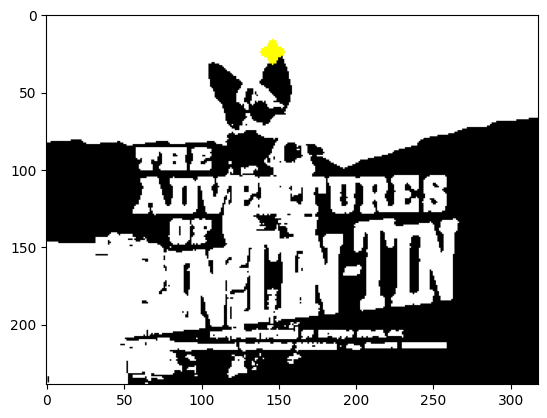

In [ ]:
plt.imshow(rgb)
plt.show()

## Prática

**Exercício 1**: De forma semelhante ao que foi feito anteriormente, marque um crosshair na primeira coluna em que aparece um pixel preto. Dessa coluna, marque a linha mais acima. 

> **Resposta**: cheque se a cruz foi colocada na posição $(x,y)=(0, 83)$